# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv(url, sep=',')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [5]:
apple['Date'] = pd.to_datetime(apple.Date)
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [6]:
apple = apple.set_index('Date', drop=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [7]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [8]:
apple.index = apple.index.sort_values()
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,96.27,96.80,93.92,95.35,65130000,95.35
1980-12-15,94.14,95.99,94.10,95.97,56305400,95.97
1980-12-16,93.67,94.10,93.20,94.03,22891800,94.03
1980-12-17,93.87,94.06,93.09,93.48,28420900,93.48
1980-12-18,93.52,94.07,93.13,93.52,38170200,93.52


### Step 9. Get the last business day of each month

In [10]:
apple.resample('BM').mean().head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,92.398462,93.131538,91.752308,92.492308,4.713550e+07,92.492308
1981-01-30,422.370000,425.928095,419.978571,423.629048,6.771857e+07,90.798095
1981-02-27,585.178947,590.721053,581.923684,587.244211,8.256305e+07,83.624211
1981-03-31,531.667273,534.422727,527.529545,531.340000,6.056254e+07,75.483636
1981-04-30,529.412381,532.993810,525.578095,528.899048,6.135950e+07,75.138095


### Step 10.  What is the difference in days between the first day and the oldest

In [14]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [20]:
months = apple.resample('M')
len(months)

404

In [21]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,96.27,96.80,93.92,95.35,65130000,95.35
1980-12-15,94.14,95.99,94.10,95.97,56305400,95.97
1980-12-16,93.67,94.10,93.20,94.03,22891800,94.03
1980-12-17,93.87,94.06,93.09,93.48,28420900,93.48
1980-12-18,93.52,94.07,93.13,93.52,38170200,93.52


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

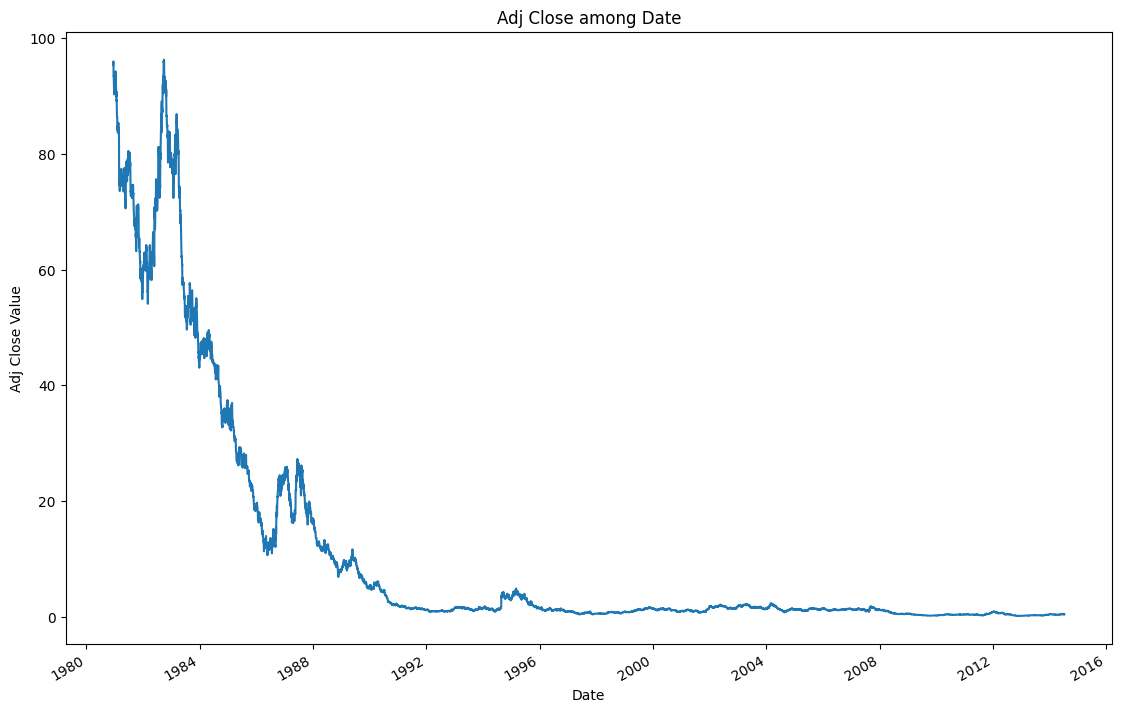

In [28]:
plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot()

plt.xlabel('Date')
plt.ylabel('Adj Close Value')
plt.title('Adj Close among Date')

plt.show()

### BONUS: Create your own question and answer it.

In [67]:
OHLC = apple.loc[:, 'Open':'Close']
Q = OHLC.resample('Q').mean()

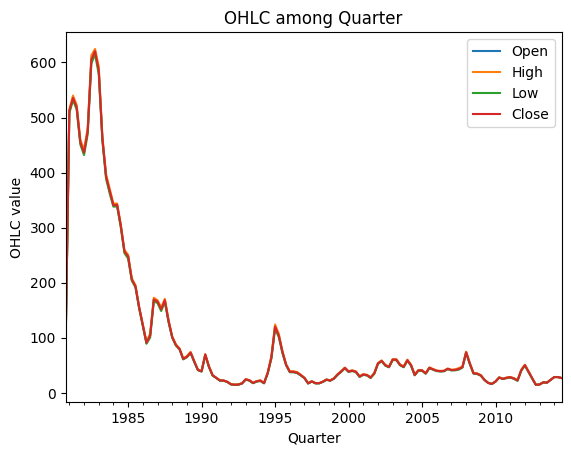

In [68]:
Q.plot()

plt.xlabel('Quarter')
plt.ylabel('OHLC value')
plt.title('OHLC among Quarter')

plt.show()